In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [4]:
market_data = pd.read_csv('./round1_data/prices_round_1_day_-1.csv', sep=";", header=0)
market_data.head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
1,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
2,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
3,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
4,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
5,-1,100,SQUID_INK,2004,24,NaN,NaN,NaN,NaN,2007,24,NaN,NaN,NaN,NaN,2005.5,0.0
6,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
7,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0
8,-1,200,SQUID_INK,2003,22,NaN,NaN,NaN,NaN,2006,20,NaN,NaN,NaN,NaN,2004.5,0.0
9,-1,300,SQUID_INK,2003,31,NaN,NaN,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2004.5,0.0


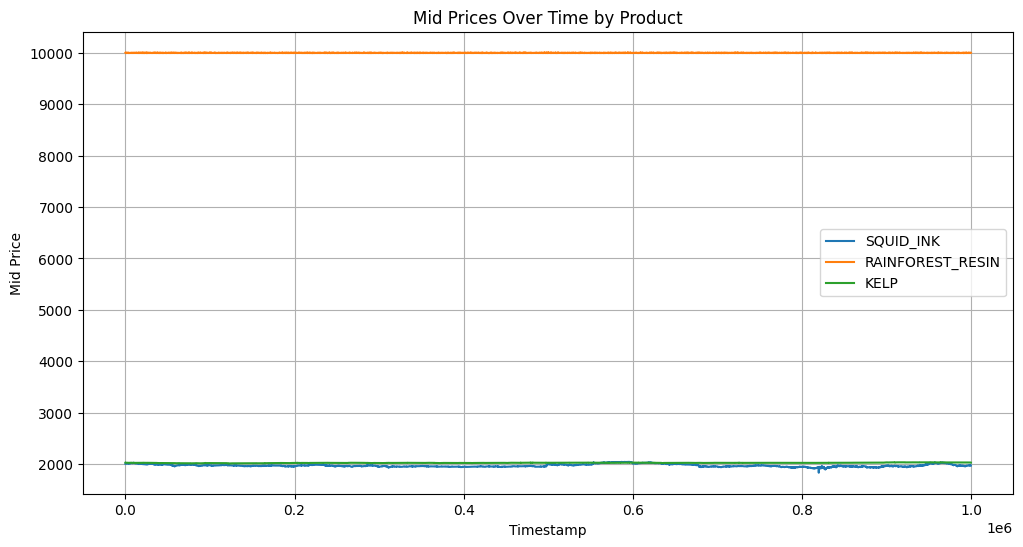

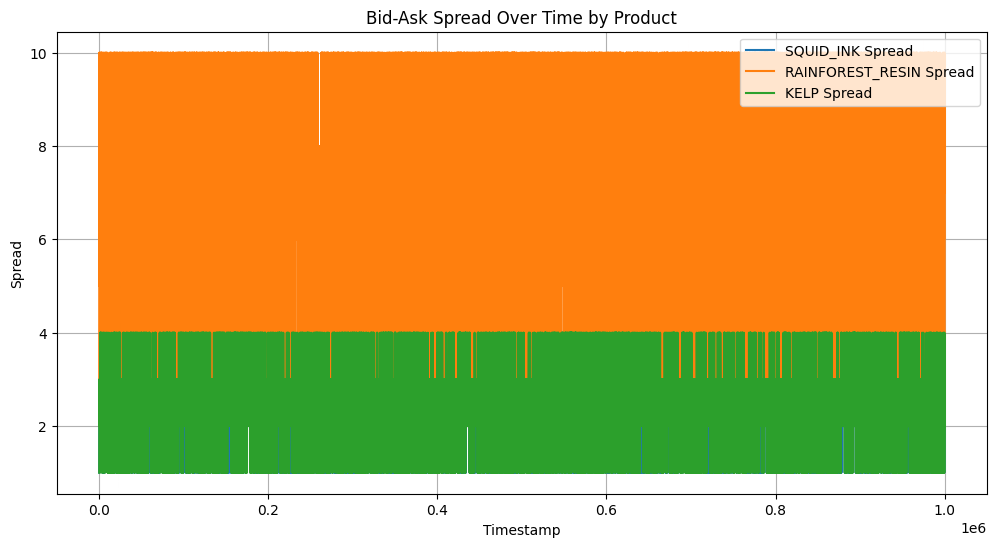

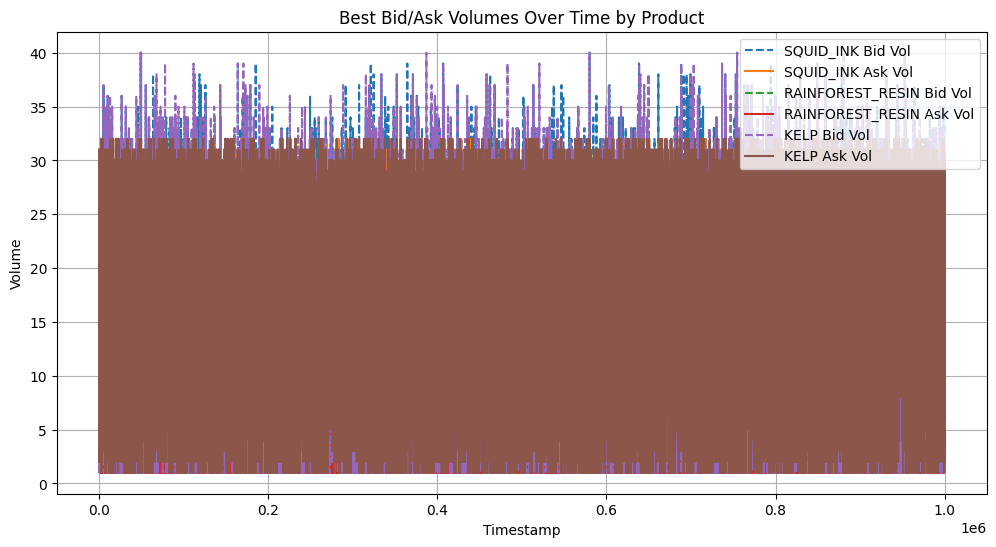

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [5]:
# Plot mid prices over time for all products
plt.figure(figsize=(12, 6))
for product in market_data['product'].unique():
    product_data = market_data[market_data['product'] == product]
    plt.plot(product_data['timestamp'], product_data['mid_price'], label=product)

plt.title('Mid Prices Over Time by Product')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot bid-ask spread over time
plt.figure(figsize=(12, 6))
for product in market_data['product'].unique():
    product_data = market_data[market_data['product'] == product]
    spread = product_data['ask_price_1'] - product_data['bid_price_1']
    plt.plot(product_data['timestamp'], spread, label=f'{product} Spread')

plt.title('Bid-Ask Spread Over Time by Product')
plt.xlabel('Timestamp')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

# Plot volume at best bid/ask
plt.figure(figsize=(12, 6))
for product in market_data['product'].unique():
    product_data = market_data[market_data['product'] == product]
    plt.plot(product_data['timestamp'], product_data['bid_volume_1'], 
             label=f'{product} Bid Vol', linestyle='--')
    plt.plot(product_data['timestamp'], product_data['ask_volume_1'], 
             label=f'{product} Ask Vol', linestyle='-')

plt.title('Best Bid/Ask Volumes Over Time by Product')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Create interactive plot using plotly
fig = px.line(market_data, x='timestamp', y='mid_price', color='product',
              title='Interactive Mid Prices Over Time')
fig.show()